<a href="https://colab.research.google.com/github/Pranav-J-Kumar/data-science/blob/main/pgm13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.utils as utils
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as Data
import torch.nn.functional as F

# OS is a standard python library, which we use for accessing the file system.
import os

# Matplotllib is used for ploting graphs
import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

In [2]:
DONWLOAD_MNIST=True

DOWNLOAD_MNIST = True
if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
    DOWNLOAD_MNIST = True
    
# Loading the training data
mnist_train = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,
)

# Similarly loading the testing data
mnist_test = torchvision.datasets.MNIST(
    root='./mnist/',
    train=False,                                     
    transform=torchvision.transforms.ToTensor(),    
    download=DOWNLOAD_MNIST,
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


Shape of the training data (no of images, height, width) :  torch.Size([60000, 28, 28])
Shape of the testing data (no of images, height, width) :  torch.Size([10000, 28, 28])


###### An Example Image, Label pair ############


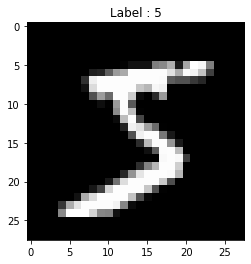

Mini batch size: images - torch.Size([1000, 1, 28, 28])  labels -  torch.Size([1000])
torch.Size([1, 28, 28]) tensor(6)


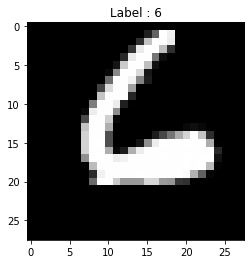

torch.Size([1, 28, 28]) tensor(0)


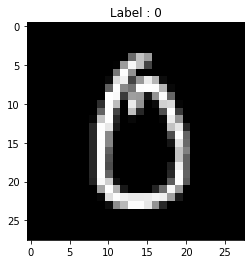

Mini batch size: images - torch.Size([1000, 1, 28, 28])  labels -  torch.Size([1000])
torch.Size([1, 28, 28]) tensor(6)


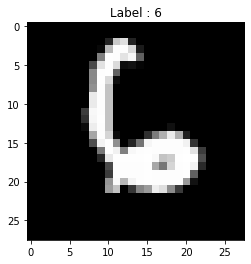

torch.Size([1, 28, 28]) tensor(4)


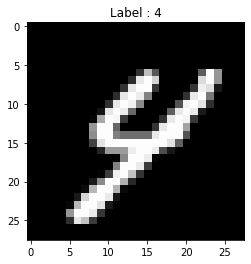

In [3]:
# ploting one example

# ploting one example
print("Shape of the training data (no of images, height, width) : ", mnist_train.train_data.size()) # (60000, 28, 28)
print("Shape of the testing data (no of images, height, width) : ", mnist_test.test_data.size())  # (10000, 28, 28)
print("\n")
print("###### An Example Image, Label pair ############")
plt.imshow(mnist_train.train_data[0].numpy(), cmap='gray')
plt.title('Label : %i' % mnist_train.train_labels[0])
plt.show()


# Minibatch
# Machine learning dataset can be really large. Hence we cannot often load the entire data in to the memory. Hence neural network training is done by loading small batches (commonly called minibatch) of data, and using it to update the learnable parameters (weights and biases) of the model.

batch_size = 1000 # The mini batch size used for doing the training

# Data Loader for easy mini-batch loading,
# the image batch shape will be (batch_size, 1, 28, 28)

# Data Loader for easy mini-batch loading,
# the image batch shape will be (batch_size, 1, 28, 28)
train_loader = Data.DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True)
test_loader = Data.DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=True)

count = 0
for mini_batch in train_loader:
    images, labels = mini_batch
    print('Mini batch size: images -', images.size(), ' labels - ', labels.size())
    for j in range(2):#basically simply iterating a few times (hence range(2)) to print a few images in this mini-batch
        print(images[j].size(), labels[j])
        plt.imshow(images[j][0].numpy(), cmap='gray')
        plt.title('Label : %i' % labels[j])
        plt.show()

# Some logic to break out of the loop.
        if j == 1:
            break
    if count == 1:
        break
        
    count +=1

In [4]:
# Definining neural network in python by a class which inherits from nn.Module
class LeNet(nn.Module):
    """LeNet feature extractor model."""

    def __init__(self):
        """Init LeNet feature extractor model."""
        super(LeNet, self).__init__()

        # Defining the CNNfeature Extractor
        self.feature_extractor = nn.Sequential(
            # input [1 x 28 x 28]
            # 1st conv layer
            # Conv which convolves input image with 6 filters of 5x5 size, without padding
            nn.Conv2d(1, 6, kernel_size=5),
            # [6 x 24 x` 24]
            nn.MaxPool2d(kernel_size=2), # Max pooling subsampling operation
            # [6 x 12 x 12]
            nn.ReLU(), # Non linear activation function
            # 2nd conv layer
            # input [6 x 12 x 12]
            # Conv which convolves input image with 16 filters of 5x5 size, without padding
            nn.Conv2d(6, 16, kernel_size=5),
            # [16 x 8 x 8]
            nn.MaxPool2d(kernel_size=2),
            # [16 x 4 x 4]
            nn.ReLU()
        )
        
        # Defining the Classifier
        self.classifier = nn.Sequential(
            # Linear layer with 120 nodes, taking a flattened [16 x 4 x 4] as input
            nn.Linear(16 * 4 * 4, 120),
            # Linear layer with 84 nodes
            nn.Linear(120, 84),
            # ReLU
            nn.ReLU(),
            # Output layer with as many nodes as number of classes
            nn.Linear(84, 10)
        )
        
    def forward(self, input):
        """Define a Forward pass of the LeNet."""
        out = self.feature_extractor(input) # Pass input through the feature extractor
        out = out.view(-1, 16 * 4 * 4) # Reshape the 2D to a vector
        out = self.classifier(out) # pass features through the classifier to get predictions
        return out

In [5]:
# Create an instance of the model

lenet=LeNet()

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
lenet=lenet.to(device)


# Print out the size of parameters of each layer
for name, param in lenet.state_dict().items():
    print(name, '\n', param.size(), '\n')

feature_extractor.0.weight 
 torch.Size([6, 1, 5, 5]) 

feature_extractor.0.bias 
 torch.Size([6]) 

feature_extractor.3.weight 
 torch.Size([16, 6, 5, 5]) 

feature_extractor.3.bias 
 torch.Size([16]) 

classifier.0.weight 
 torch.Size([120, 256]) 

classifier.0.bias 
 torch.Size([120]) 

classifier.1.weight 
 torch.Size([84, 120]) 

classifier.1.bias 
 torch.Size([84]) 

classifier.3.weight 
 torch.Size([10, 84]) 

classifier.3.bias 
 torch.Size([10]) 



In [6]:
correct = 0.0
total = 0.0
for mini_batch in train_loader:
    images, labels = mini_batch
    images = images.to(device)
    labels = labels.to(device)
    
    # Do the Forward pass
    result = lenet(images)
    
    # Covert the predictions to probabilities, by applying the softmax function
    result = F.softmax(result,dim=1)
 
    # Find the prediction with the largest probability
    _,pred = torch.max(result.data,1)
    #print(pred)
    total += labels.size(0)
    #print(labels)
    # correct is incremented by the numer of predictions which are correct (equal to the ground truth labels)
    correct += (pred == labels).sum().item()
    #print((pred == labels).sum())
print(f'Accuracy of random Train Data: {100 * correct/total}')

    # Loss Function and Gradient Update Algorithm
    
    # The loss function is a way of measuring the difference between the current prediction of the network and the correct prediction. As we saw in the lecture, the gradient descent algorithm is essentially adjusting the learnable parameters (weights and biases) of the network so as to decrease the loss. Here we will be using the cross entropy loss, which is commonly used for classification task (predicting a class from 0 to 9).

    # The learning rate is a small fraction which is used to multiply the gradients of the loss function with respect to the weights. The idea behind doing this is that, we do not want to make drastic changes the weights of the neural network in each step, but rather a gradual one.
    
loss_func = nn.CrossEntropyLoss()

# Set the learning rate
learning_rate = 0.001

optimizer = torch.optim.Adam(lenet.parameters(), lr=learning_rate)
# optimizer = torch.optim.SGD(lenet.parameters(), lr=learning_rate, momentum=0.0)

Accuracy of random Train Data: 9.871666666666666


####### Epoch  0
####### Epoch  1
####### Epoch  2
####### Epoch  3
####### Epoch  4
####### Epoch  5
####### Epoch  6
####### Epoch  7


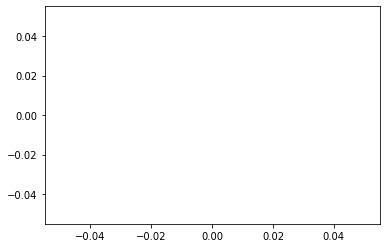

In [7]:
# Train Model with train data
epoch = 8
loss_history = []

for i in range(epoch):
    print('####### Epoch ', i)
    for j,[image,label] in enumerate(train_loader):
        # You can try with and without using GPUs, by setting this variable before the loop
       # if use_gpu == "cuda":
        image = image.to(device)
        label = label.to(device)
            
        #image = image
        #label = label
        
        optimizer.zero_grad() # zero out the gradients from the preivous step 
        predictions = lenet.forward(image) # Do forward pass on the current mini batch
        loss = loss_func(predictions, label) # Compute loss on the current mini batch
        loss.backward() # Do backward pass. That is compute all the gradients for the current minibatch
        optimizer.step() # Update the parameters using the gradients with the learning rate
        
if j % 100 == 0:
            loss_history.append(loss.item())
                    
        # display.clear_output(wait=True)
plt.plot(loss_history)
plt.show()

In [8]:
# Compute the Accuracy of the Model on the Test data

# Finally we need to check how well the model is doing on the testing data. This step is also done by loading the data one minibatch at a time and computing the accuracy, which is finally averaged.


correct = 0.0
total = 0.0
for mini_batch in test_loader:
    images, labels = mini_batch
    
    # You can try with and without using GPUs, by setting this variable before the loop
    #if use_gpu == "cuda":
    images = images.to(device)
    labels = labels.to(device)
        
    #images = images
    
     # Doing the Forward pass
    result = lenet(images)
 #   print(result.shape)

# Coverting the predictions to probabilities, by applying the softmax function

result=F.softmax(result,dim=1)

#print(torch.sum(result,dim=1))
 
    # Finding the prediction with the largest probability
_,pred = torch.max(result.data,1)
    
total += labels.size(0)
    # correct is incremented by the numer of prediction which are correct (equal to the ground truth labels)
correct += (pred == labels).sum().item()
    
print("Accuracy of Test Data: {0:.2f}%".format(correct/total *100))

Accuracy of Test Data: 97.30%
